<a href="https://colab.research.google.com/github/kebabee/Machine-Learning/blob/main/pytorch_derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import torch
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# 5.3
Having a function f(x), compute its first, second, and third-order derivatives. Plot them in one picture. Let ranges from [0,10]. Compare obtained results with the true values. Computations perform using Autograd PyTorch package.

Set of functions:

$ f1(x) = x^2 \sin(x) + \sqrt{x} $

$ f2(x) = \frac{ln(x)}{x} + (\sqrt{x}+1)^2$

$ f3(x) = \sqrt{x}\, exp(-x^2)$

### True derivatives equations:

In [70]:
x = sp.symbols('x')
f1 = x**2 * sp.sin(x) + sp.sqrt(x)
f2 = sp.log(x)*x + (sp.sqrt(x)+1)**2
f3 = sp.sqrt(x) * sp.exp(-x**2)

f1_1der = sp.diff(f1, x)
f1_2der = sp.diff(f1_1der, x)
f1_3der = sp.diff(f1_2der, x)

f2_1der = sp.diff(f2, x)
f2_2der = sp.diff(f2_1der, x)
f2_3der = sp.diff(f2_2der, x)

f3_1der = sp.diff(f3, x)
f3_2der = sp.diff(f3_1der, x)
f3_3der = sp.diff(f3_2der, x)

print(f"f1'(x) = {f1_1der}")
print(f"f1''(x) = {f1_2der}")
print(f"f1'''(x) = {f1_3der}\n")
print(f"f2'(x) = {f2_1der}")
print(f"f2''(x) = {f2_2der}")
print(f"f2'''(x) = {f2_3der}\n")
print(f"f3'(x) = {f3_1der}")
print(f"f3''(x) = {f3_2der}")
print(f"f3'''(x) = {f3_3der}")

f1'(x) = x**2*cos(x) + 2*x*sin(x) + 1/(2*sqrt(x))
f1''(x) = -x**2*sin(x) + 4*x*cos(x) + 2*sin(x) - 1/(4*x**(3/2))
f1'''(x) = -x**2*cos(x) - 6*x*sin(x) + 6*cos(x) + 3/(8*x**(5/2))

f2'(x) = log(x) + 1 + (sqrt(x) + 1)/sqrt(x)
f2''(x) = 3/(2*x) - (sqrt(x) + 1)/(2*x**(3/2))
f2'''(x) = -7/(4*x**2) + 3*(sqrt(x) + 1)/(4*x**(5/2))

f3'(x) = -2*x**(3/2)*exp(-x**2) + exp(-x**2)/(2*sqrt(x))
f3''(x) = 4*x**(5/2)*exp(-x**2) - 4*sqrt(x)*exp(-x**2) - exp(-x**2)/(4*x**(3/2))
f3'''(x) = -8*x**(7/2)*exp(-x**2) + 18*x**(3/2)*exp(-x**2) - 3*exp(-x**2)/(2*sqrt(x)) + 3*exp(-x**2)/(8*x**(5/2))


### First function:

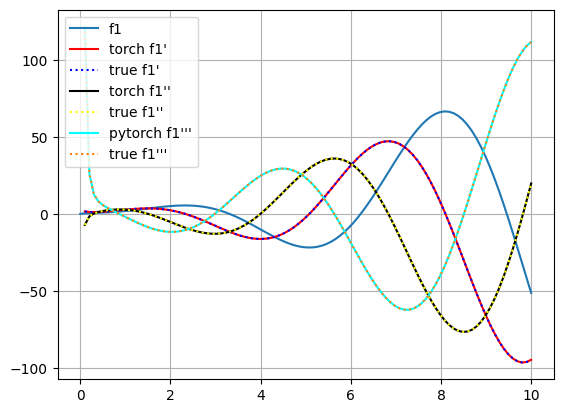

In [77]:
def f1(x):
    return x**2 * torch.sin(x) + torch.sqrt(x)

def true_f1_1der(x):
    return x**2*torch.cos(x) + 2*x*torch.sin(x) + 1/(2*torch.sqrt(x))

def true_f1_2der(x):
    return -x**2*torch.sin(x) + 4*x*torch.cos(x) + 2*torch.sin(x) - 1/(4*x**(3/2))

def true_f1_3der(x):
    return -x**2*torch.cos(x) - 6*x*torch.sin(x) + 6*torch.cos(x) + 3/(8*x**(5/2))

x = torch.linspace(0, 10, 100)
x.requires_grad = True

f1_values = f1(x)
f1_1der = torch.autograd.grad(f1_values, x, torch.ones_like(x), create_graph=True)[0]
f1_2der = torch.autograd.grad(f1_1der, x, torch.ones_like(x), create_graph=True)[0]
f1_3der = torch.autograd.grad(f1_2der, x, torch.ones_like(x), create_graph=True)[0]

plt.plot(x.detach().numpy(), f1_values.detach().numpy(), label='f1')
plt.plot(x.detach().numpy(), f1_1der.detach().numpy(), label="torch f1'", c='red')
plt.plot(x.detach().numpy(), true_f1_1der(x).detach().numpy(), ':', label="true f1'", c='blue')
plt.plot(x.detach().numpy(), f1_2der.detach().numpy(), label="torch f1''", c='black')
plt.plot(x.detach().numpy(), true_f1_2der(x).detach().numpy(), ':', label="true f1''", c='yellow')
plt.plot(x.detach().numpy(), f1_3der.detach().numpy(), label="pytorch f1'''", c='cyan')
plt.plot(x.detach().numpy(), true_f1_3der(x).detach().numpy(), ':', label="true f1'''")
plt.legend()
plt.grid(True)
plt.show()

### Second function:

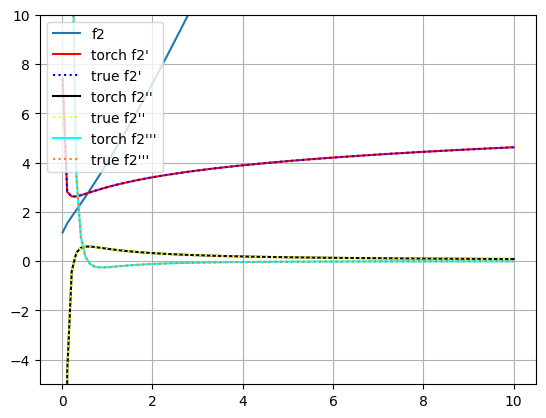

In [78]:
def f2(x):
    return torch.log(x)*x + (torch.sqrt(x)+1)**2

def true_f2_1der(x):
    return torch.log(x) + 1 + (torch.sqrt(x) + 1)/torch.sqrt(x)

def true_f2_2der(x):
    return 3/(2*x) - (torch.sqrt(x) + 1)/(2*x**(3/2))

def true_f2_3der(x):
    return -7/(4*x**2) + 3*(torch.sqrt(x) + 1)/(4*x**(5/2))

x = torch.linspace(0.01, 10, 100)
x.requires_grad = True

f2_values = f2(x)
f2_1der = torch.autograd.grad(f2_values, x, torch.ones_like(x), create_graph=True)[0]
f2_2der = torch.autograd.grad(f2_1der, x, torch.ones_like(x), create_graph=True)[0]
f2_3der = torch.autograd.grad(f2_2der, x, torch.ones_like(x), create_graph=True)[0]

plt.plot(x.detach().numpy(), f2_values.detach().numpy(), label='f2')
plt.plot(x.detach().numpy(), f2_1der.detach().numpy(), label="torch f2'", c='red')
plt.plot(x.detach().numpy(), true_f2_1der(x).detach().numpy(), ':', label="true f2'", c='blue')
plt.plot(x.detach().numpy(), f2_2der.detach().numpy(), label="torch f2''", c='black')
plt.plot(x.detach().numpy(), true_f2_2der(x).detach().numpy(), ':', label="true f2''", c='yellow')
plt.plot(x.detach().numpy(), f2_3der.detach().numpy(), label="torch f2'''", c='cyan')
plt.plot(x.detach().numpy(), true_f2_3der(x).detach().numpy(), ':', label="true f2'''")
plt.legend()
plt.ylim(-5,10)
plt.grid(True)
plt.show()

### Third function:

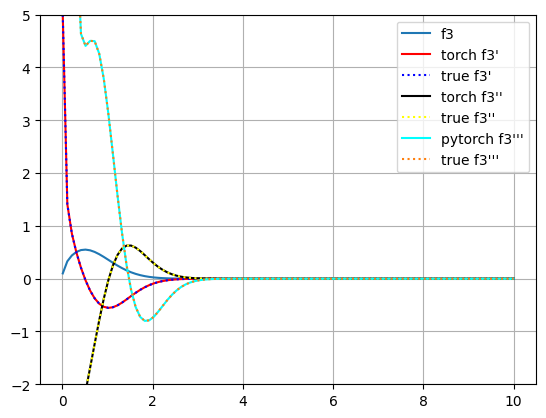

In [79]:
def f3(x):
    return torch.sqrt(x) * torch.exp(-x**2)

def true_f3_1der(x):
    return -2 * x ** (3/2) * torch.exp(-x ** 2) + torch.exp(-x ** 2) / (2 * torch.sqrt(x))

def true_f3_2der(x):
    return 4 * x ** (5/2) * torch.exp(-x ** 2) - 4 * torch.sqrt(x) * torch.exp(-x ** 2) - torch.exp(-x ** 2) / (4 * x ** (3/2))

def true_f3_3der(x):
    return -8 * x ** (7/2) * torch.exp(-x ** 2) + 18 * x ** (3/2) * torch.exp(-x ** 2) - 3 * torch.exp(-x ** 2) / (2 * torch.sqrt(x)) + 3 * torch.exp(-x ** 2) / (8 * x ** (5/2))

x = torch.linspace(0.01, 10, 100)
x.requires_grad = True

f3_values = f3(x)
f3_1der = torch.autograd.grad(f3_values, x, torch.ones_like(x), create_graph=True)[0]
f3_2der = torch.autograd.grad(f3_1der, x, torch.ones_like(x), create_graph=True)[0]
f3_3der = torch.autograd.grad(f3_2der, x, torch.ones_like(x), create_graph=True)[0]

plt.plot(x.detach().numpy(), f3_values.detach().numpy(), label='f3')
plt.plot(x.detach().numpy(), f3_1der.detach().numpy(), label="torch f3'", c='red')
plt.plot(x.detach().numpy(), true_f3_1der(x).detach().numpy(), ':', label="true f3'", c='blue')
plt.plot(x.detach().numpy(), f3_2der.detach().numpy(), label="torch f3''", c='black')
plt.plot(x.detach().numpy(), true_f3_2der(x).detach().numpy(), ':', label="true f3''", c='yellow')
plt.plot(x.detach().numpy(), f3_3der.detach().numpy(), label="pytorch f3'''", c='cyan')
plt.plot(x.detach().numpy(), true_f3_3der(x).detach().numpy(), ':', label="true f3'''")
plt.legend()
plt.ylim(-2,5)
plt.grid(True)
plt.show()

### Is there any difference?

Error in third order derivative for last function:

In [74]:
x = torch.linspace(0.01, 100, 100000)
x.requires_grad = True

f3_values = f3(x)
f3_1der = torch.autograd.grad(f3_values, x, torch.ones_like(x), create_graph=True)[0]
f3_2der = torch.autograd.grad(f3_1der, x, torch.ones_like(x), create_graph=True)[0]
f3_3der = torch.autograd.grad(f3_2der, x, torch.ones_like(x), create_graph=True)[0]

true_vals = true_f3_3der(x).detach().numpy()
pytorch_vals = f3_3der.detach().numpy()

differences = 0

for i in range(len(true_vals)):
  differences += np.abs(true_vals[i] - pytorch_vals[i])

print(f"Total error: {differences}")
print(f"Error per point: {differences / len(true_vals)}")

Total error: 0.025825039354664535
Error per point: 2.5825039354664533e-07
